In [3]:
import pandas as pd
import os

### 1.Merging the 12 months of sales data into a single file.

In [6]:
files=[file for file in os.listdir("C:\\Users\\Ravindhar\\Pandas_Sales_Analysis_Project\\SalesAnalysis\\Sales_Data")]
All_months_data=pd.DataFrame()
for file in files:
    data_1=pd.read_csv("C:\\Users\\Ravindhar\\Pandas_Sales_Analysis_Project\\SalesAnalysis\\Sales_Data\\"+file)
    All_months_data=pd.concat([All_months_data,data_1])
    
All_months_data.to_csv("combined_data.csv", index=False)

### read in upadated data

In [8]:
All_Data = pd.read_csv("C:\\Users\\Ravindhar\\Pandas_Sales_Analysis_Project\\combined_data.csv")
All_Data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Cleaning the Data

In [11]:
All_Data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [13]:
#finding the nan values and deleting them.
All_Data[All_Data.isnull().any(axis=1)]
# using the dropna method to deleting this nan.
All_Data=All_Data.dropna(how="all")

In [16]:
All_Data.isnull().sum()  # Null values removed successfully.

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### ->finding 'or' and deleting .

In [19]:
All_Data=All_Data[All_Data["Order Date"].str[0:2]!='Or']

### ->converting type of columns.

In [22]:
All_Data["Quantity Ordered"]=pd.to_numeric(All_Data["Quantity Ordered"])
All_Data["Price Each"]=pd.to_numeric(All_Data["Price Each"])
All_Data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### 2.Creating the new month columns

In [25]:
All_Data["Month"]=All_Data['Order Date'].str[0:2] # taking the first two letters from  order date, to create month cloumn.

In [27]:
All_Data["Month"]=All_Data["Month"].astype('int32') # converting str into int as month is numerical.

### 3. Adding sales columns.

In [30]:
All_Data["Sales"]=All_Data['Quantity Ordered']*All_Data['Price Each']
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### 4.Adding City Column.

In [33]:
def get_city(Address):
    return Address.split(',')[1]
def get_state(Address):
    return Address.split(',')[2].split(' ')[1]
All_Data['City']=All_Data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### 5.Adding hour and minute column.

In [78]:
# changing the order date into datetime format.
All_Data["Order Date"]=pd.to_datetime(All_Data["Order Date"])

In [37]:
All_Data['Hour']=All_Data['Order Date'].dt.hour
All_Data['Minutes']=All_Data['Order Date'].dt.minute



## Task #1: What was the best month for sales? How much was earned that month?

In [42]:
result=All_Data.groupby('Month').sum(numeric_only=True)
result

,Quantity Ordered,Price Each,Sales,Hour,Minutes
Month,,,,,
1,10903,1811768.38,1822256.73,139485,282440
2,13449,2188884.72,2202022.42,172669,354885
3,17005,2791207.83,2807100.38,218969,447559
4,20558,3367671.02,3390670.24,262259,544186
5,18667,3135125.13,3152606.75,238780,487899
6,15253,2562025.61,2577802.26,195528,402436
7,16072,2632539.56,2647775.76,206169,417349
8,13448,2230345.42,2244467.88,172289,353857
9,13109,2084992.09,2097560.13,168513,341698


In [43]:
# ouptup : 46,13,443.34 Rupees sales has been done on 12th month.

#### showing results through visualization.

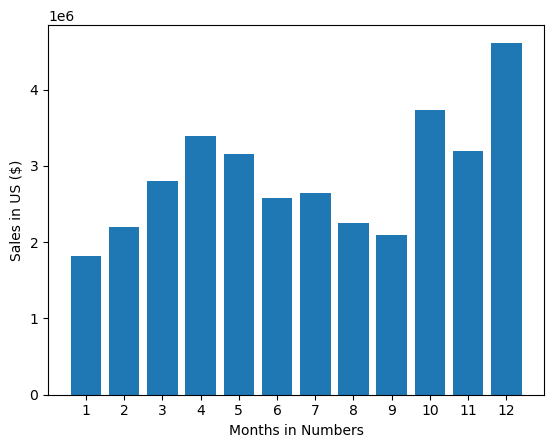

In [45]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.xlabel("Months in Numbers")
plt.ylabel("Sales in US ($)")
plt.show()

## Task #2 : What city had the highest number of sales.

In [47]:
results=All_Data.groupby("City").sum(numeric_only=True)
results

,Quantity Ordered,Price Each,Month,Sales,Hour,Minutes
City,,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264,442932
Austin (TX),11153,1809873.61,69829,1819581.75,141946,289060
Boston (MA),22528,3637409.77,141112,3661642.01,288225,590442
Dallas (TX),16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444,866638
New York City (NY),27932,4635370.83,175741,4664317.43,357696,733598
Portland (ME),2750,447189.25,17144,449758.27,35211,72856
Portland (OR),11303,1860558.22,70621,1870732.34,144421,295533
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265,1319477


In [48]:
# output : San Francisco (CA) had highest number of sales, which is 82,62,203.91.

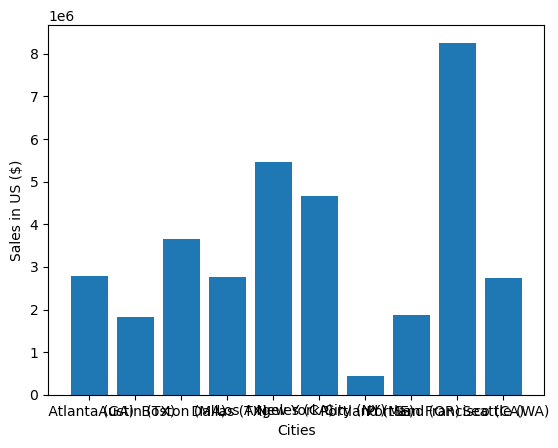

In [49]:
# visualizing the output with matplotlib.
cities=[city for city,df in All_Data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities)
plt.ylabel("Sales in US ($)")
plt.xlabel("Cities")
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

## Task #3: What time(hour) should we display advertisements to maximize likelihood of customers buying product?

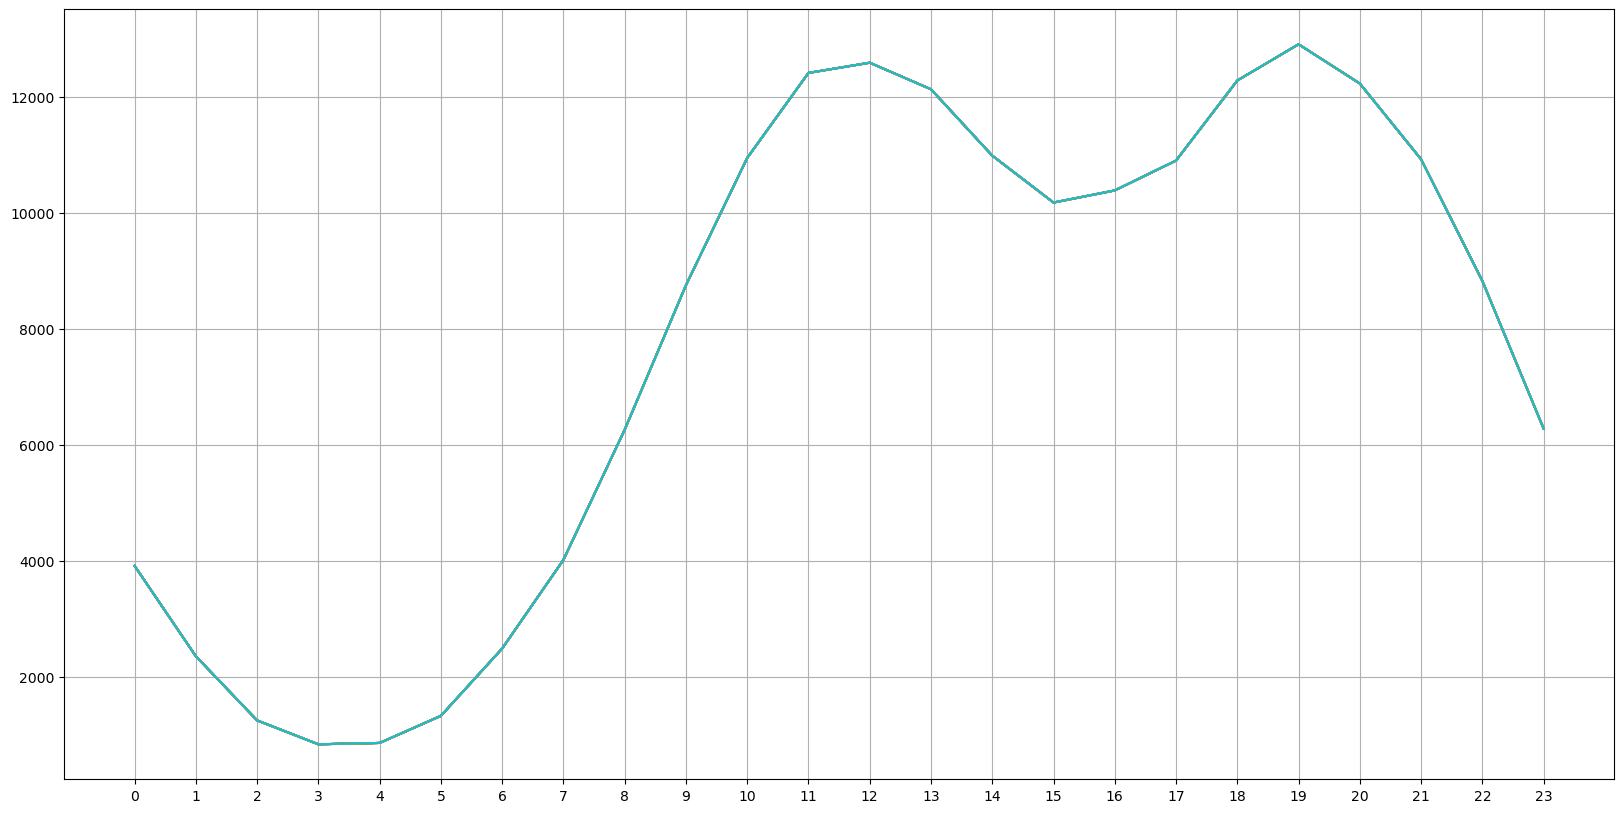

In [51]:
hours=[hours for hours,df in All_Data.groupby('Hour')]

plt.plot(hours, All_Data.groupby("Hour").count())
plt.rcParams['figure.figsize']=[10,5]
plt.xticks(hours)
plt.grid()
plt.show()


In [52]:
# output : In between the 11 to 12 Am and 7 PM is the best time to Advertise.

## Task #4: What products are sold most together.

In [54]:
dupe_df=All_Data[All_Data['Order ID'].duplicated(keep=False)]
dupe_df['grouped']=dupe_df.groupby("Order ID")['Product'].transform(lambda x:','.join(x))
dupe_df=dupe_df[['Order ID','grouped']].drop_duplicates()
dupe_df

C:\Users\Ravindhar\AppData\Local\Temp\ipykernel_10528\1211633742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupe_df['grouped']=dupe_df.groupby("Order ID")['Product'].transform(lambda x:','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [55]:
# these are libraries provided in stack overflow for identifying the most common things.
from itertools import combinations
from collections import Counter

count=Counter()
for row in dupe_df['grouped']:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Task #5 : What product sold the most ? Why do you think it solds the most.

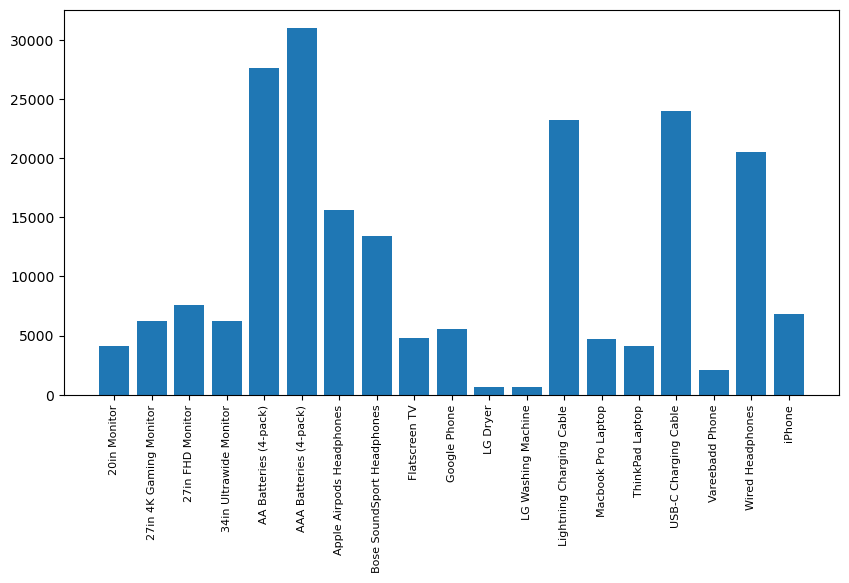

In [57]:
product_group=All_Data.groupby('Product')
Quantity=product_group["Quantity Ordered"].sum()

products=[product for product , df in product_group]
plt.bar(products,Quantity)
plt.xticks(products,rotation='vertical',size=8)
plt.show()



In [58]:
# output : AAA Batteries (4 Pack) is the product which sold more, because battery cells are common in everyone's life for running small devices like remotes, toys, computer pheriperals etc.. this is the reason of batteries are sold more.

In [80]:
All_Data.to_csv("Final_Dataset.csv")